# **<center>--- Titanic Dataset Analysis --- </center>**

## ***Import Librarries***

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

## ***Load the Titanic dataset***

In [51]:
titanic_df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## ***Checking Dataset Shape (Rows x Columns)***

In [52]:
print("Dataset contains", titanic_df.shape[0], "rows and", titanic_df.shape[1], "columns.")

Dataset contains 891 rows and 12 columns.


In [53]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## ***Column in the DataFrame***

In [54]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## ***Data Type of Each Attribute of the DataFrame***

In [55]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## ***Numeric Columns In the DataFrame***

In [56]:
numeric_columns = titanic_df.select_dtypes(include= 'int64')
print('Numeric columns in the DataFrame:\n')
for column in numeric_columns:
    print('- ', column)

Numeric columns in the DataFrame:

-  PassengerId
-  Survived
-  Pclass
-  SibSp
-  Parch


## ***Float columns in the DataFrame***

In [57]:
float_columns = titanic_df.select_dtypes(include= 'float')
print('Float columns in the DataFrame:\n')
for column in float_columns:
    print('- ', column)

Float columns in the DataFrame:

-  Age
-  Fare


## ***Categorical columns in the DataFrame***

In [58]:
categorical_columns = titanic_df.select_dtypes(include= 'object')
print('Categorical columns in the DataFrame:\n')
for column in categorical_columns:
    print('- ', column)

Categorical columns in the DataFrame:

-  Name
-  Sex
-  Ticket
-  Cabin
-  Embarked


## ***Statistical  Summary of Numeric / Float columns***

df.describe(include='all') is used to get:

Mean, Median, Min, Max for numerical columns

Unique values, most frequent items for categorical columns This gives an initial sense of the data spread and possible outliers.

In [59]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## ***Missing Values in each Attribute of the DataFrame***

In [60]:
#checked how many missing (NaN) values exist in each column using df.isnull().sum(). 
#This step helps identify which columns need cleaning.

titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## ***Visualizing Missing Values using Bar Chart***

Created a horizontal bar chart to visualize missing values per column, making it easier to spot which columns are most incomplete (like Cabin).

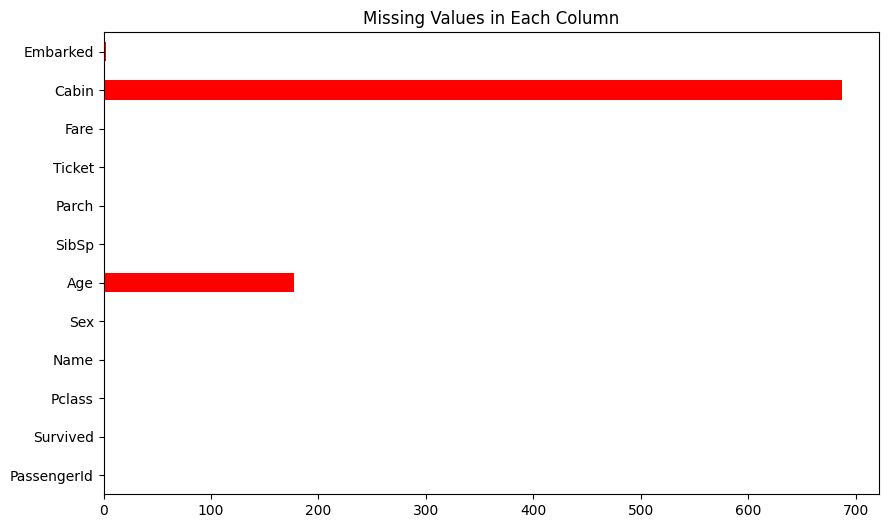

In [61]:
plt.figure(figsize=(10,6))
titanic_df.isnull().sum().plot(kind='barh', color='red')
plt.title('Missing Values in Each Column')
plt.show()

## ***Percentage of Missing Values in each Attribute***

In [62]:
titanic_df.isnull().sum() / len(titanic_df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## ***Gender Distribution (Value Counts + Bar Plot)***

Plotted a bar chart of male vs. female passengers to understand gender distribution. This also hints at survival patterns which we explore later.

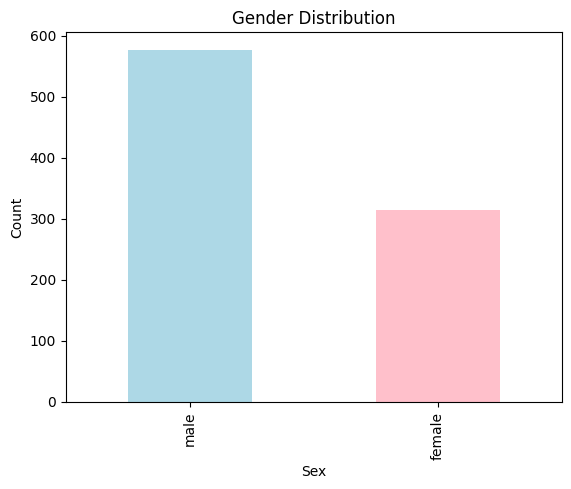

In [63]:
titanic_df['Sex'].value_counts().plot(kind='bar', color=['lightblue', 'pink'])

plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

## ***Survival Rate by Gender (Bar Plot)***

Analyzed how survival rates vary between males and females using a grouped bar plot. From here, it’s evident that females had a much higher survival rate compared to males, which aligns with the historical “women and children first” evacuation policy.

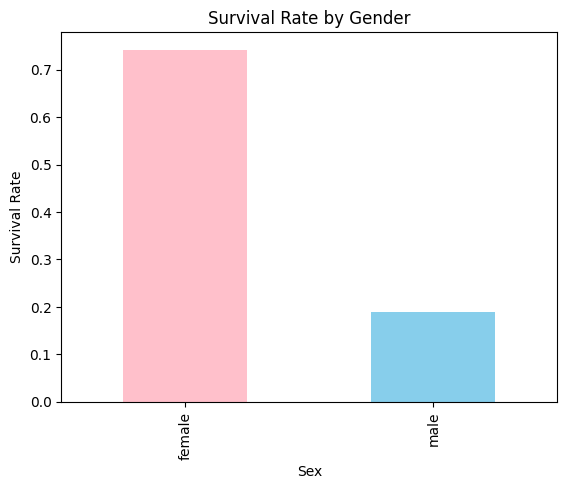

In [64]:
titanic_df.groupby('Sex')['Survived'].mean().plot(kind='bar', color=['pink','skyblue'])
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

## ***Age Distribution***

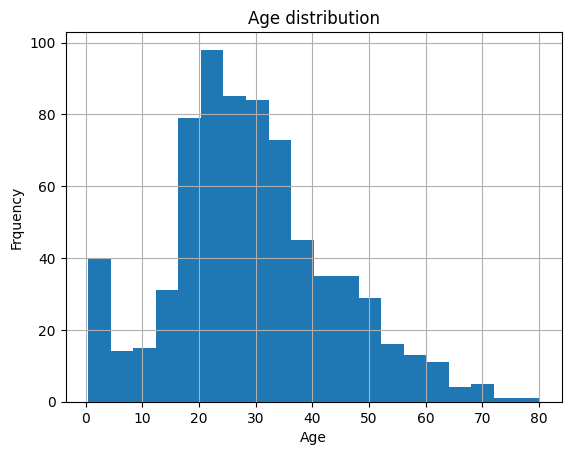

In [65]:
titanic_df['Age'].hist(bins= 20)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frquency')
plt.show()

## ***Plot age distribution of survivors only***



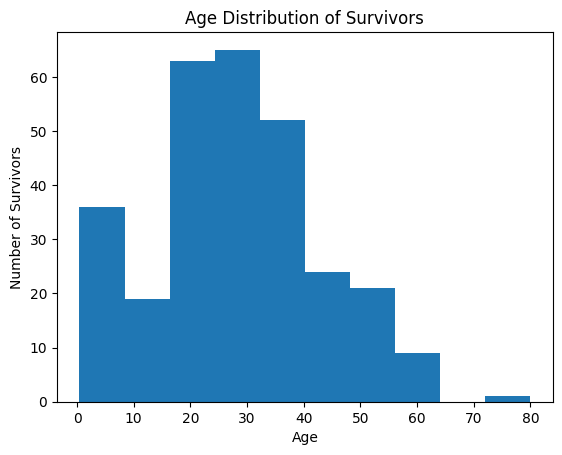

In [66]:
survivors = titanic_df[titanic_df['Survived'] == 1]

survivors['Age'].plot(
    kind='hist'
)
plt.title('Age Distribution of Survivors')
plt.xlabel('Age')
plt.ylabel('Number of Survivors')
plt.show()

In [67]:
numeric_df = pd.DataFrame(titanic_df.select_dtypes('number'))
numeric_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


## ***Plot a pie chart showing the proportion of each class***


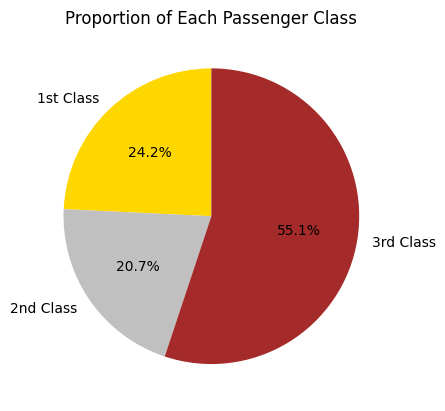

In [68]:
class_counts = titanic_df['Pclass'].value_counts().sort_index()

# Pie chart
class_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['gold', 'silver', 'brown'],
    labels=['1st Class', '2nd Class', '3rd Class']
)
plt.title('Proportion of Each Passenger Class')
plt.ylabel('')
plt.show()

## ***Show the survival rate by class (Pclass)***


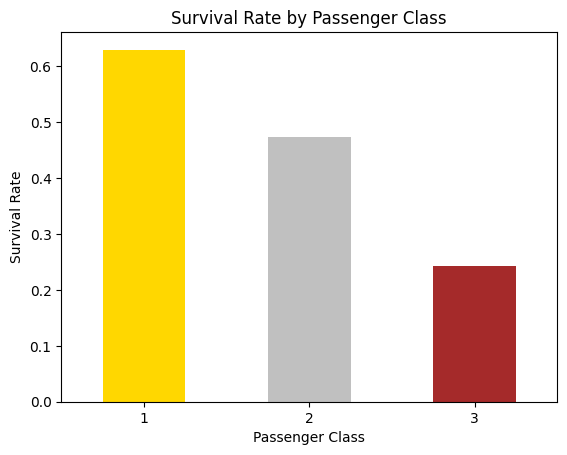

In [69]:
survival_rate_by_class = titanic_df.groupby('Pclass')['Survived'].mean()

survival_rate_by_class.plot(
    kind='bar',
    color=['gold', 'silver', 'brown']
)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

## ***Correlation of Numeric Columns***

<Axes: >

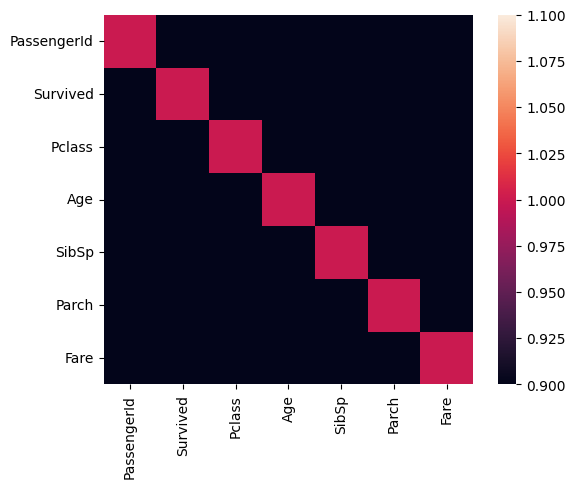

In [70]:
corr = numeric_df.corr()

sns.heatmap(corr,vmin= 1.0,  vmax= 1.0, square= True)

## ***Data Distribution of Fare Column***

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


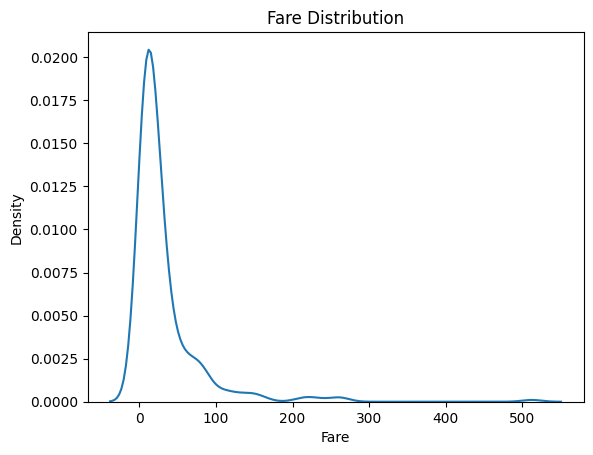

In [71]:
sns.kdeplot(titanic_df['Fare'].dropna())
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()


## ***Checking for Imbalance Data in the Target Variable***
- Data is Imbalanced

In [72]:
titanic_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## ***Handle missing values***
- Impute 'age' with the mean

In [73]:
imputer_age = SimpleImputer(strategy="mean")
titanic_df["Age"] = imputer_age.fit_transform(titanic_df[["Age"]])

In [74]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

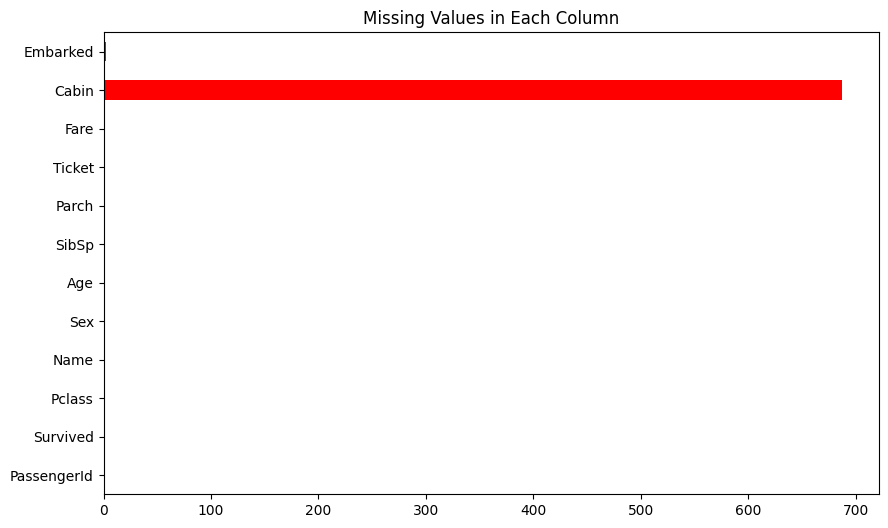

In [75]:
plt.figure(figsize=(10,6))
titanic_df.isnull().sum().plot(kind='barh', color='red')
plt.title('Missing Values in Each Column')
plt.show()

In [76]:
titanic_df.drop('Cabin', axis=1, inplace=True)

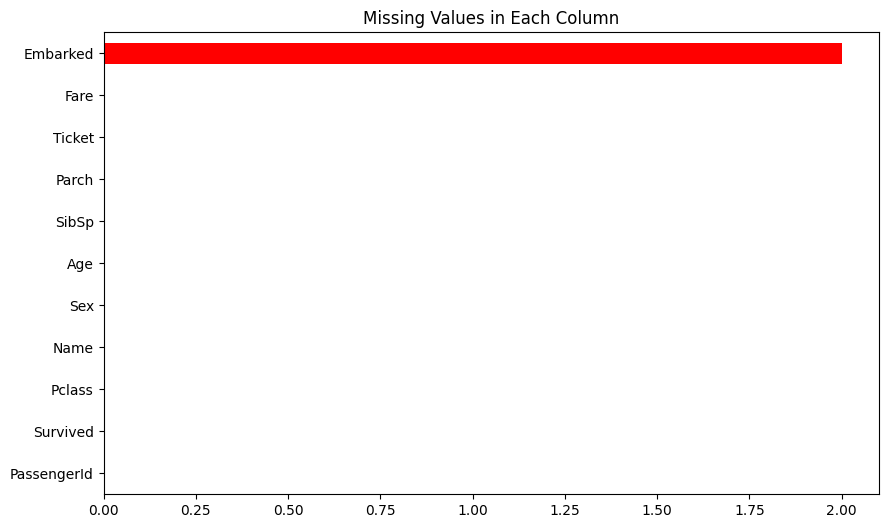

In [77]:
plt.figure(figsize=(10,6))
titanic_df.isnull().sum().plot(kind='barh', color='red')
plt.title('Missing Values in Each Column')
plt.show()

- Impute 'embarked' with the most frequent value

In [78]:
imputer_embarked = SimpleImputer(strategy="most_frequent")
titanic_df["Embarked"] = imputer_embarked.fit_transform(titanic_df[["Embarked"]]).ravel()